In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [5]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train['Age_99']=x_train['Age'].fillna(99)
x_train['Age_minus1']=x_train['Age'].fillna(-1)
x_train['Fare_999']=x_train['Age'].fillna(999)
x_train['Fare_minus1']=x_train['Age'].fillna(-1)

In [9]:
print('original age variable variance:',x_train['Age'].var())
print('Age variance after medain imputation:',x_train['Age_99'].var())
print('Age variance after mean imputation:',x_train['Age_minus1'].var())
print('original fare variable variance:',x_train['Fare'].var())
print('Fare variance after medain imputation:',x_train['Fare_999'].var())
print('Fare variance after mean imputation:',x_train['Fare_minus1'].var())



original age variable variance: 210.2517072477438
Age variance after medain imputation: 932.9665366701436
Age variance after mean imputation: 315.99550362600644
original fare variable variance: 2761.031434948639
Fare variance after medain imputation: 148855.21230540806
Fare variance after mean imputation: 315.99550362600644


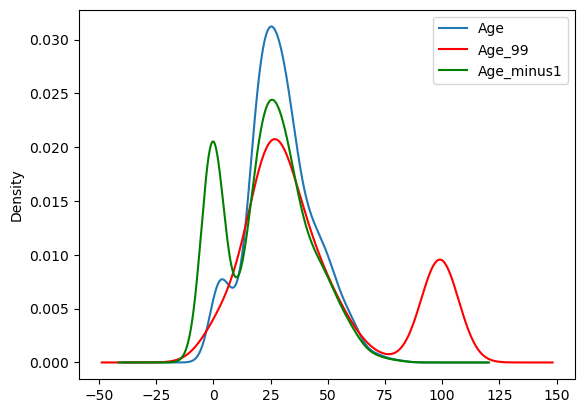

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original variable distribution
x_train['Age'].plot(kind='kde',ax=ax)
# variable imputed with the median
x_train['Age_99'].plot(kind='kde',ax=ax,color='red')
# variable imputed with the mean
x_train['Age_minus1'].plot(kind='kde',ax=ax,color='green')
# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

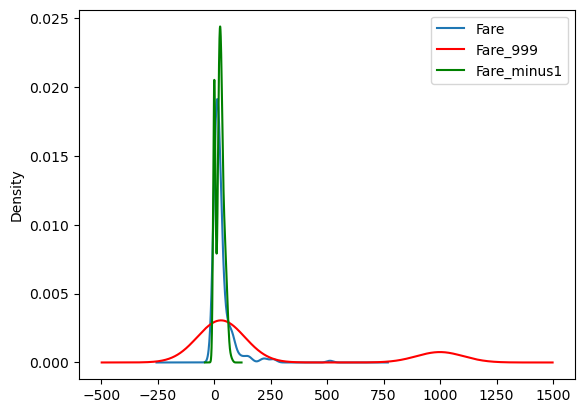

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original variable distribution
x_train['Fare'].plot(kind='kde',ax=ax)
# variable imputed with the median
x_train['Fare_999'].plot(kind='kde',ax=ax,color='red')
# variable imputed with the mean
x_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green')
# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [12]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,210.251707,210.251707
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,-2341.722703,135.785804
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,-24.108815,-5.034556
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,10827.811509,-166.460682
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,-4508.566357,315.995504
Fare_999,210.251707,-2341.722703,-24.108815,10827.811509,-4508.566357,148855.212305,-4508.566357
Fare_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,-4508.566357,315.995504


In [13]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,1.000000,1.000000
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,-0.114825,0.145071
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,-0.037139,-0.168329
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,0.918810,-0.306576
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,-0.657379,1.000000
Fare_999,1.000000,-0.114825,-0.037139,0.918810,-0.657379,1.000000,-0.657379
Fare_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,-0.657379,1.000000


<h1>Using sklearn</h1>

In [14]:
from sklearn.compose import ColumnTransformer

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
im1=SimpleImputer(strategy='constant',fill_value=99)
im2=SimpleImputer(strategy='constant',fill_value=999)

In [17]:
trf=ColumnTransformer([
    ('im1',im1,['Age']),
    ('im2',im2,['Fare'])
],remainder='passthrough')


In [18]:
trf.fit(x_train)

C:\Users\91983\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('im1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('im2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [19]:
trf.named_transformers_['im1'].statistics_

array([99.])

In [20]:
trf.named_transformers_['im2'].statistics_

array([999.])

In [22]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [23]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])